<a href="https://colab.research.google.com/github/Daniel-ASG/Machine-Learning-A-Z-Hands-On-Python-R-In-Data-Science/blob/main/data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Daniel-ASG/Machine-Learning-A-Z-Hands-On-Python-R-In-Data-Science/main/Data.csv')
print('dataset')
display(dataset)

X = dataset.iloc[:, :-1].values # Features: independent variables
print('\n\nFeatures: independent variables matrix')
print('X =')
display(pd.DataFrame(X, columns=['Country', 'Age', 'Salary']))


y = dataset.iloc[:, -1].values  # dependent variables
print('\n\nDependent variables vector')
print('y =')
display(pd.DataFrame(y, columns=['Purchased']))

dataset


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes




Features: independent variables matrix
X =


,Country,Age,Salary
0,France,44,72000
1,Spain,27,48000
2,Germany,30,54000
3,Spain,38,61000
4,Germany,40,NaN
5,France,35,58000
6,Spain,NaN,52000
7,France,48,79000
8,Germany,50,83000
9,France,37,67000




Dependent variables vector
y =


,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


## Taking care of missing data

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
# to replace missing data we'll use SimpleImputer to fill them with mean

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3]) # Only numerical columns
X[:, 1:3] = imputer.transform(X[:, 1:3])

print('X =')
pd.DataFrame(X, columns=['Country', 'Age', 'Salary'])

X =


,Country,Age,Salary
0,France,44,72000
1,Spain,27,48000
2,Germany,30,54000
3,Spain,38,61000
4,Germany,40,63777.8
5,France,35,58000
6,Spain,38.7778,52000
7,France,48,79000
8,Germany,50,83000
9,France,37,67000


## Encoding categorical data

### Encoding the **Independent Variable**

In [5]:
print(dataset.Country.unique())

['France' 'Spain' 'Germany']


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

print('X =')
pd.DataFrame(X, columns=['France', 'Spain', 'Germany', 'Age', 'Salary'])

X =


,France,Spain,Germany,Age,Salary
0,1,0,0,44,72000
1,0,0,1,27,48000
2,0,1,0,30,54000
3,0,0,1,38,61000
4,0,1,0,40,63777.8
5,1,0,0,35,58000
6,0,0,1,38.7778,52000
7,1,0,0,48,79000
8,0,1,0,50,83000
9,1,0,0,37,67000


### Encoding the **Dependent Variable**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

print(f'y = {y}')

y = [0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('X_train =')
pd.DataFrame(X_train, columns=['France', 'Spain', 'Germany', 'Age', 'Salary'])

X_train =


,France,Spain,Germany,Age,Salary
0,0,0,1,38.7778,52000
1,0,1,0,40,63777.8
2,1,0,0,44,72000
3,0,0,1,38,61000
4,0,0,1,27,48000
5,1,0,0,48,79000
6,0,1,0,50,83000
7,1,0,0,35,58000


In [12]:
print('X_test =')
pd.DataFrame(X_test, columns=['France', 'Spain', 'Germany', 'Age', 'Salary'])

X_test =


,France,Spain,Germany,Age,Salary
0,0,1,0,30,54000
1,1,0,0,37,67000


In [13]:
print(f'y_train = {y_train}')

y_train = [0 1 0 0 1 1 0 1]


In [14]:
print(f'y_test = {y_test}')

y_test = [0 1]


## Feature Scaling

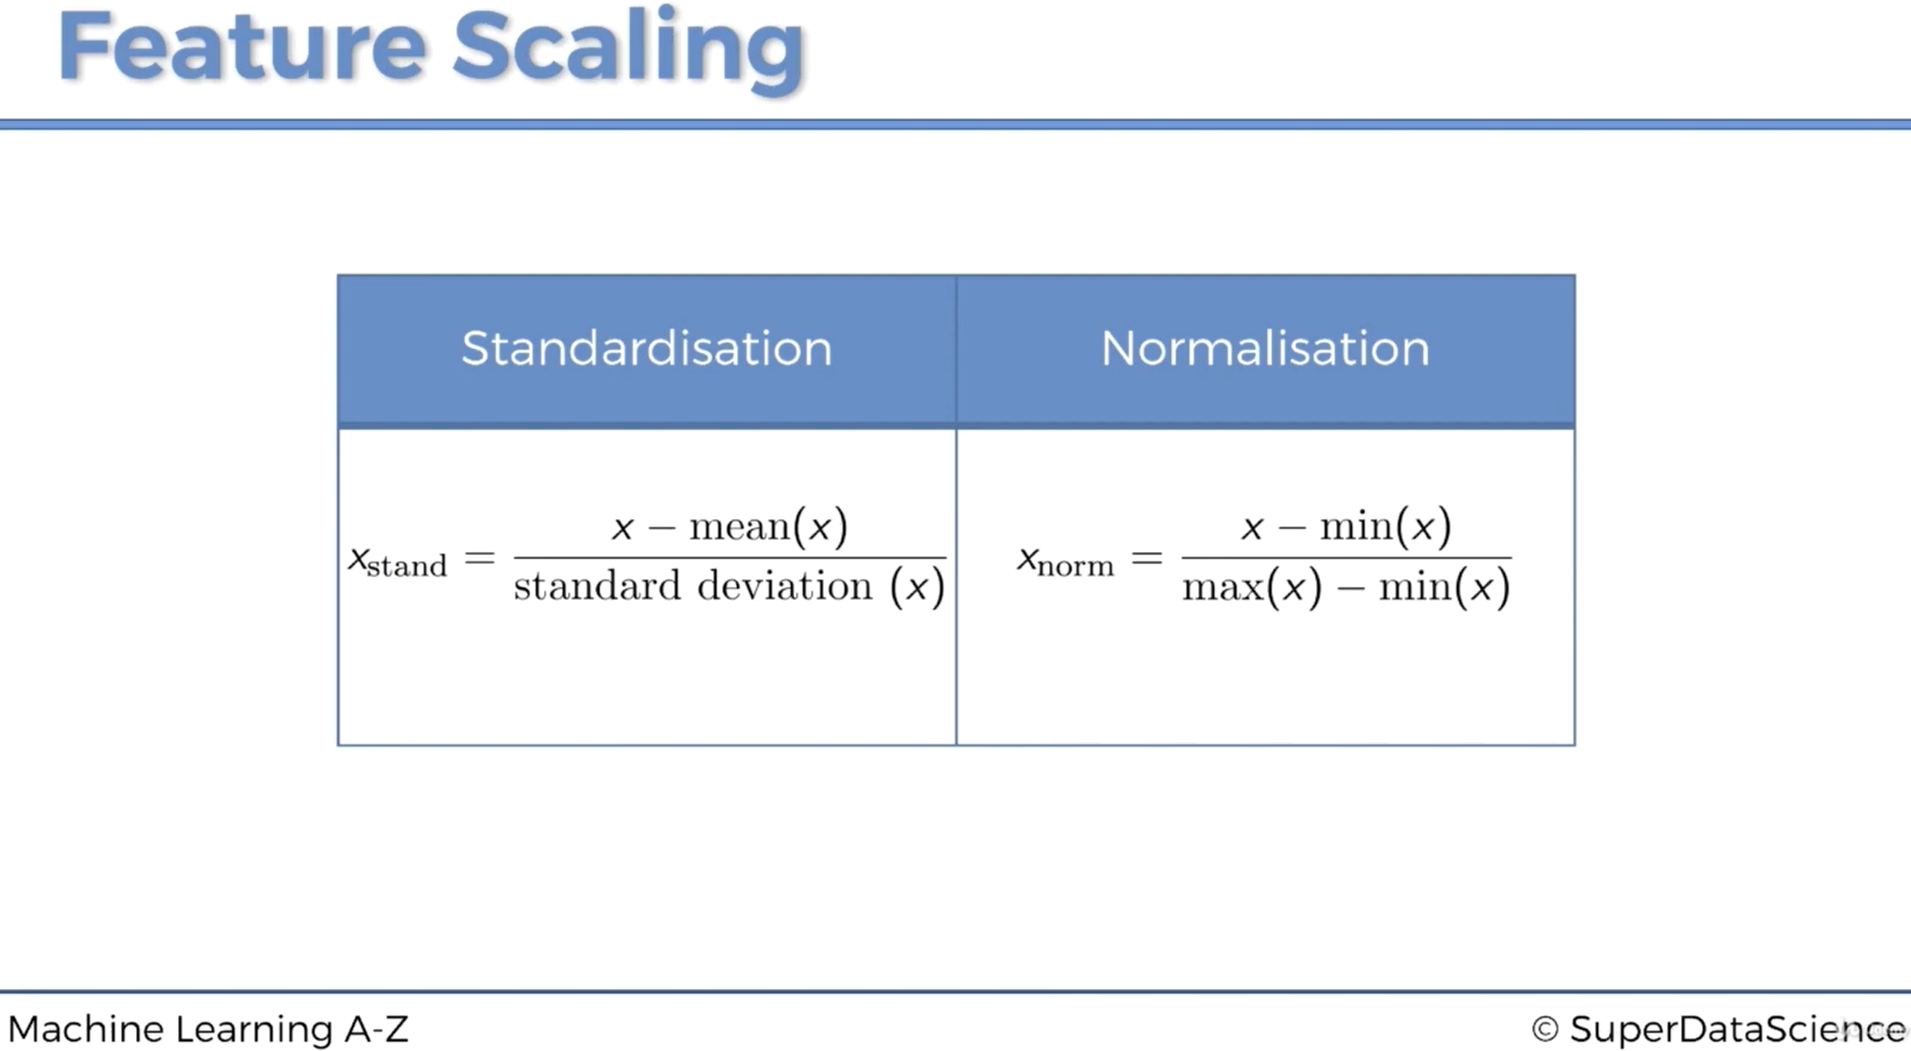

In [15]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:]) # to X_train we use "fit_transform" method
X_test[:, 3:] = sc.transform(X_test[:, 3:]) # to X_test we use "transform" method

In [17]:
print('Standardised X_train = ')
pd.DataFrame(X_train, columns=['France', 'Spain', 'Germany', 'Age', 'Salary'])

Standardised X_train = 


,France,Spain,Germany,Age,Salary
0,0,0,1,-0.191592,-1.07813
1,0,1,0,-0.0141173,-0.0701317
2,1,0,0,0.566709,0.633562
3,0,0,1,-0.30453,-0.307866
4,0,0,1,-1.9018,-1.42046
5,1,0,0,1.14753,1.23265
6,0,1,0,1.43795,1.57499
7,1,0,0,-0.74015,-0.564619


In [18]:
print('Standardised X_test = ')
pd.DataFrame(X_test, columns=['France', 'Spain', 'Germany', 'Age', 'Salary'])

Standardised X_test = 


,France,Spain,Germany,Age,Salary
0,0,1,0,-1.46618,-0.906957
1,1,0,0,-0.449737,0.20564
